In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score


In [22]:
# Load red wine
df_red = pd.read_csv("winequality-red.csv", sep=";")
df_red["wine_type"] = "red"

# Load white wine
df_white = pd.read_csv("winequality-white.csv", sep=";")
df_white["wine_type"] = "white"

df_white.head()
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [23]:
##CLEAN
# missing values
df = df.dropna()

#sep labels
X = df.drop('quality', axis=1)
y = df['quality']

# combine red and white datasets
df_combined = pd.concat([df_red, df_white], axis=0).reset_index(drop=True)
print(df_combined["wine_type"].value_counts())
print(df_combined.head())

wine_type
white    4898
red      1599
Name: count, dtype: int64
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality wi

In [24]:
# train/test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
#ridge
ridge_model = Ridge(alpha=1.0)

# fit model
ridge_model.fit(X_train_scaled, y_train)


Ridge()

In [26]:
# prediction test 
y_pred = ridge_model.predict(X_test_scaled)

# RMSE and R^2
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R² Score: {r2:.2f}')


Root Mean Squared Error (RMSE): 0.62
R² Score: 0.40


In [27]:
# feature names
feature_names = X.columns

#coefficients
coefficients = ridge_model.coef_

#dataframe ->easier to see
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

print(coef_df)


                 Feature  Coefficient
10               alcohol     0.296075
9              sulphates     0.146787
5    free sulfur dioxide     0.057838
0          fixed acidity     0.040235
3         residual sugar     0.009602
7                density    -0.019810
2            citric acid    -0.027221
8                     pH    -0.060181
4              chlorides    -0.089027
6   total sulfur dioxide    -0.119853
1       volatile acidity    -0.179247


In [28]:
#prediction errors
errors = pd.DataFrame({
    'True Quality': y_test,
    'Predicted Quality': y_pred
})
errors['Error'] = errors['Predicted Quality'] - errors['True Quality']
errors['Error Magnitude'] = errors['Error'].abs()

#largest errors
worst_preds = errors.sort_values(by='Error Magnitude', ascending=False).head(5)
print(worst_preds)


      True Quality  Predicted Quality     Error  Error Magnitude
1505             3           5.234383  2.234383         2.234383
1449             8           6.243341 -1.756659         1.756659
937              4           5.648886  1.648886         1.648886
481              8           6.555535 -1.444465         1.444465
366              7           5.566396 -1.433604         1.433604


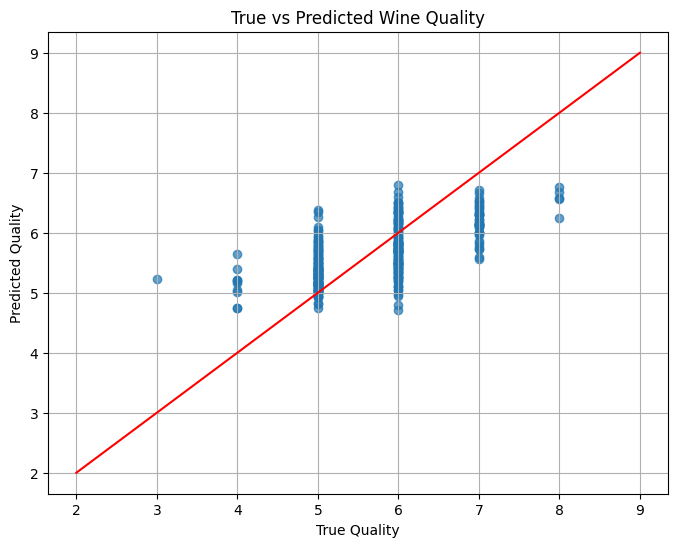

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('True Quality')
plt.ylabel('Predicted Quality')
plt.title('True vs Predicted Wine Quality')
plt.plot([2,9], [2,9], color='red') 
plt.grid(True)
plt.show()
